## 신경망
_입력층,은닉층,출력층_

신경망의 예시 그림

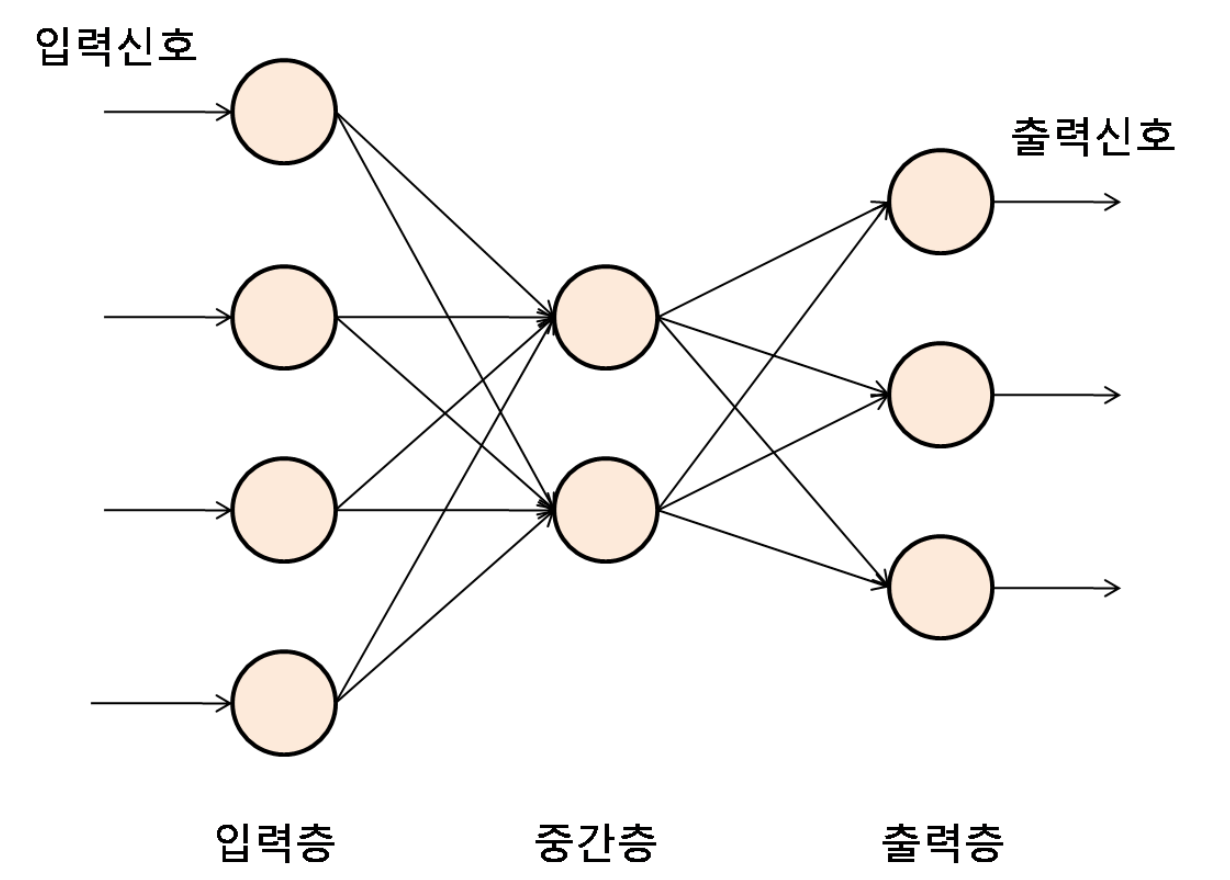
<br>
위 그림을 3층으로 구성되어 있지만 가중치를 갖는 층은 2개이므로 '2층 신경망'이라 함

## 3-1. 활성 함수의 등장

- 활성화 함수 h(x): 입력 신호의 총합을 출력 신호로 변환하는 함수. 활성화를 일으키는 지 정하는 역할.

a=b+w1x1+w2x2

가중치가 달린 입력 신호와 편향의 총합을 계산

y=h(a)

a를 h(a) 함수에 넣어 y를 출력하는 흐름

In [1]:
import math

### 활성화 함수
- 계단 함수(step function) : 임계값을 경계로 출력이 바뀜

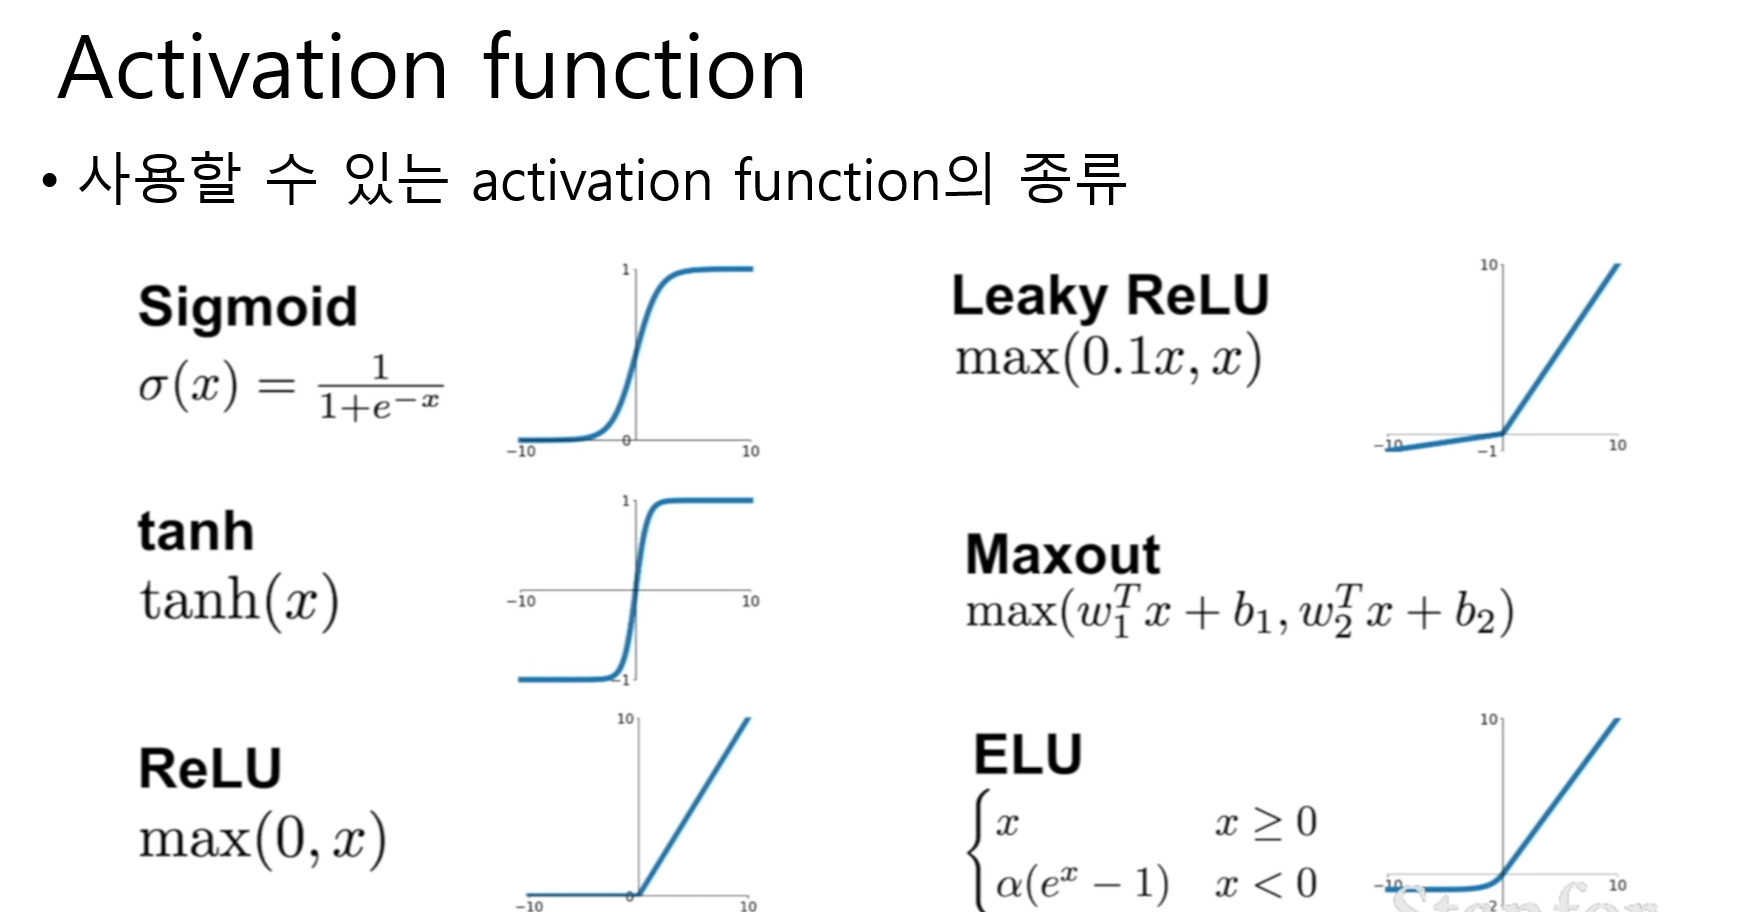

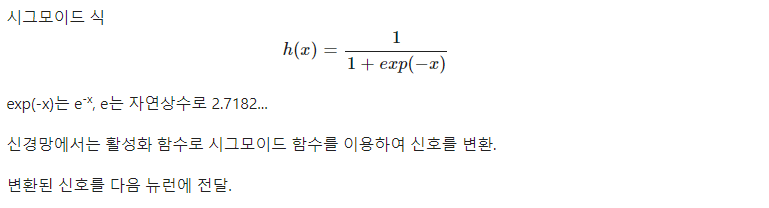

In [2]:
# sigmoid 함수-활성화 함수(Activation function)

1/(1+math.exp(-1.0))

0.7310585786300049

In [3]:
1/(1+math.exp(-2.0))

0.8807970779778823

In [4]:
# 계단 함수 구현하기
# 입력이 0을 넘으면 1을 출력, 그 외에는 0

def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [5]:
step_function(3.0)

1

In [6]:
step_function(-3.0)

0

In [8]:
# 실수(부동소수점) 만 인수로 받아들임
# 넘파이 배열을 인수로 넣도록 수정

def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [9]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [10]:
y = x > 0
y

array([False,  True,  True])

##### 계단 함수 그래프

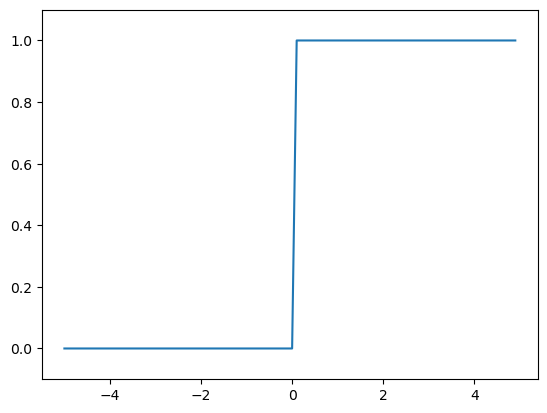

In [13]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0,dtype=np.int64)

x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) # y축 범위 지정
plt.show()

## 3-2. 시그모이드 함수 구현하기

In [18]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [19]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

###### 시그모이드 함수 그래프

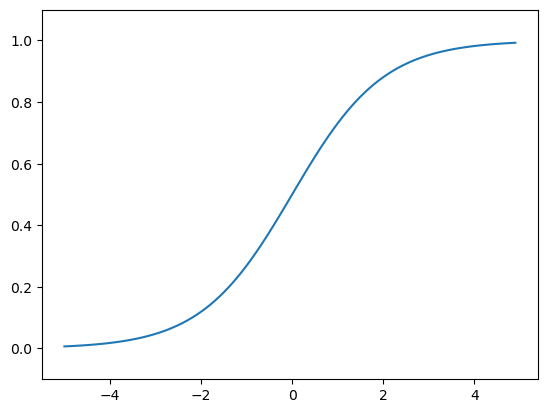

In [20]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) # y축 범위 지정
plt.show()

## 3-3. 시그모이드 함수와 계단 함수 비교

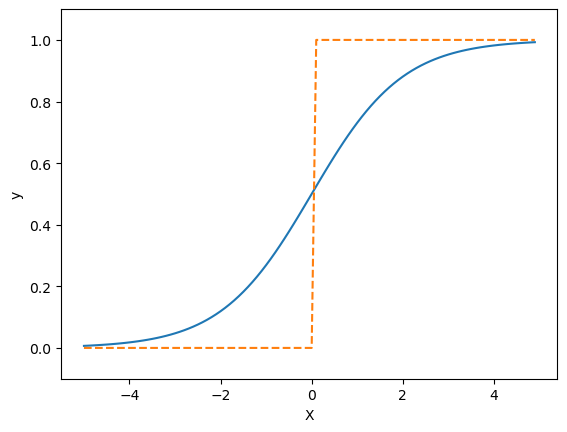

In [21]:
x = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(x)
y2 = step_function(x)

# 계단 함수(점선)과 시그모이드 함수(실선)
plt.plot(x,y1,label='sigmoid')
plt.plot(x,y2,linestyle='--',label='step_function')
plt.xlabel("X")
plt.ylabel("y")
plt.ylim(-0.1,1.1) # y축 범위 지정
plt.show()

- 계단 함수는 0을 경계로 출력이 바뀜
- 시그모이드 함수의 매끈함이 신경망 학습에서 아주 중요한 역할을 함
- 퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흘렀다면, 신경망에서는 연속적인 실수가 흐름
- 공통점
    - 입력이 중요하면 큰 값을 출력하고, 입력이 중요하지 않으면 작은 값 출력
    - 출력은 0에서 1 사이

### 비선형함수
- 계산 함수와 시그모이드 함수는 모두 비선형 함수
- 선형함수의 문제는 '은닉층이 없는 네트워크'로 똑같은 기능을 할 수 있음
- 층을 쌓고 싶으면 활성화 함수로 반드시 비선형함수를 사용해야 함

## 3-4. ReLU
ReLU(Rectified Linear Unit): 입력이 0을 넘으면 그 입력 그대로 출력. 0 이하면 0을 출력하는 함수.

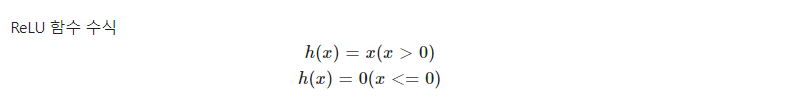

In [22]:
def relu(x):
    return np.maximum(0,x)

###### ReLU 함수의 그래프

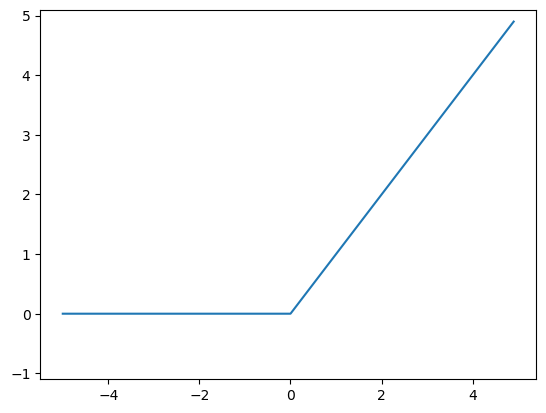

In [24]:
x = np.arange(-5.0,5.0,0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-1.1,5.1)
plt.show()

#### 출력층 계산하기
- 신경망은 분류와 회귀 모두 이용 가능
- 둘 중 어떤 문제냐에 따라 사용하는 활성 함수가 달라짐
- 일반적으로 회귀에는  항등 함수(identity func)
- 분류에는 softmax func 사용

### 3-3. 다차원 배열의 계산
넘파이의 다차원 배열 계산 설명, 신경망 구현

In [25]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [26]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [30]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
B = np.array([[1,2], [3,4],[5,6]])
print(B.shape)
np.dot(A, B)

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

In [31]:
C = np.array([[1,2],[3,4]])
print(A.shape)
print(C.shape)

np.dot(A,C)

(2, 3)
(2, 2)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [32]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A.shape)
B = np.array([7, 8])
print(B.shape)
np.dot(A, B)
# 1차원으로 나옴

(3, 2)
(2,)


array([23, 53, 83])

In [33]:
X = np.array([1, 2])
print(X.shape)
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)
Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


### 3-4. 3층 신경망 구현하기
넘파이이ㅡ 다차원 배열을 사용하여 신경망의 순방향 처리
- 입력(2개)->1층(3개)->2층(2개)->출력층(2개)

In [34]:
# 1층 3개짜리 구현하기
X = np.array([1.0, 0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(B1.shape)
print(X.shape)

A1 = np.dot(X,W1) + B1

(2, 3)
(3,)
(2,)


- 은닉층에서의 가중치 합 = a
- 활성화 함수 h()로 변환된 신호를 z로 표기

In [35]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.2 0.5 0.8]
[0.549834   0.62245933 0.68997448]


- 1층에서 2층으로 가는 과정 구현

In [36]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


2층에서 출력층으로 신호 전달. <br>
지금까지와 다르게 활성함수 h()와 항등함수(identity func)를 활성화 함수로 이용

In [37]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3